In [ ]:
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

In [ ]:
cv.__version__

In [ ]:
def get_data(gap_between_images):
  images = glob.glob('*.png')
  images = sorted(images)
  if len(images)%2!=0:
    images.pop()
  n = 0
  img1_names = []
  img2_names = []

  while n<len(images):
    img1_names.append(images[n])
    img2_names.append(images[n+1])
    n+=gap_between_images
  return img1_names,img2_names

In [ ]:
def sift(image1_name,image2_name):
  img1 = cv.imread(image1_name,cv.IMREAD_GRAYSCALE)
  img2 = cv.imread(image2_name,cv.IMREAD_GRAYSCALE) 
  # Initiate SIFT detector
  sift = cv.xfeatures2d.SIFT_create()
  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)

  # BFMatcher with default params
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  # cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good[0:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  print("using Brute force matcher")
  plt.imshow(img3),plt.show()

  # FLANN matcher
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good[0:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  print("using FLANN Matcher")
  plt.imshow(img3,),plt.show()

In [ ]:
def surf(image1_name,image2_name):
  img1 = cv.imread(image1_name,cv.IMREAD_GRAYSCALE)
  img2 = cv.imread(image2_name,cv.IMREAD_GRAYSCALE) 
  # Create SURF object. You can specify params here or later.
  # Here I set Hessian Threshold to 400
  surf = cv.xfeatures2d.SURF_create(400)
  # Find keypoints and descriptors directly
  kp1, des1 = surf.detectAndCompute(img1,None)
  kp2, des2 = surf.detectAndCompute(img2,None)

  # BFMatcher with default params
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  # cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good[0:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  print("using Brute force matcher")
  plt.imshow(img3),plt.show()

  # FLANN matcher
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good[0:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  print("using FLANN Matcher")
  plt.imshow(img3,),plt.show()

In [ ]:
def orb(image1_name,image2_name):
  img1 = cv.imread(image1_name,cv.IMREAD_GRAYSCALE)
  img2 = cv.imread(image2_name,cv.IMREAD_GRAYSCALE)
  # img1 = cv.imread('frame_000.png',cv.IMREAD_GRAYSCALE)
  # img2 = cv.imread('frame_001.png',cv.IMREAD_GRAYSCALE)
  # Initiate ORB detector
  orb = cv.ORB_create()
  # find the keypoints and descriptors with ORB
  kp1, des1 = orb.detectAndCompute(img1,None)
  kp2, des2 = orb.detectAndCompute(img2,None)
  # draw only keypoints location,not size and orientation

  # BFMatcher with default params
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  # cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good[0:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  print("using Brute force matcher")
  plt.imshow(img3),plt.show()

  # FLANN matcher
  FLANN_INDEX_LSH = 6
  index_params = dict(algorithm = FLANN_INDEX_LSH, table_number = 6,key_size=12,multi_probe_level=1)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good[0:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  print("using FLANN Matcher")
  plt.imshow(img3,),plt.show()

sift for 1st set of images
using Brute force matcher


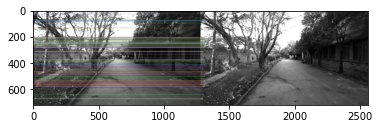

using FLANN Matcher


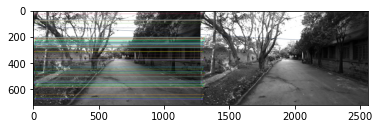

surf for 1st set of images
using Brute force matcher


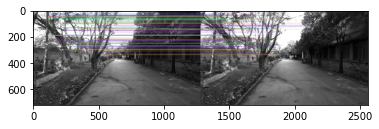

using FLANN Matcher


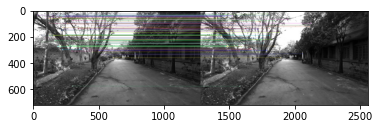

orb for 1st set of images
using Brute force matcher


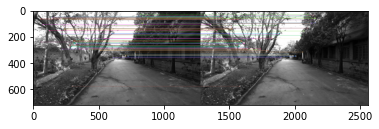

using FLANN Matcher


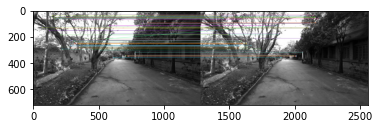

sift for 1st set of images
using Brute force matcher


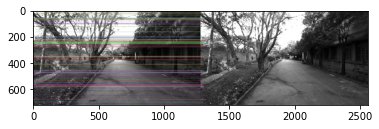

using FLANN Matcher


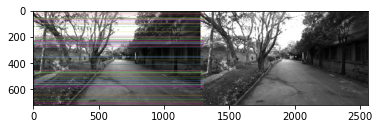

surf for 1st set of images
using Brute force matcher


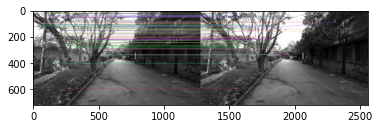

using FLANN Matcher


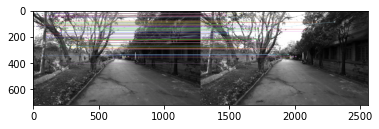

orb for 1st set of images
using Brute force matcher


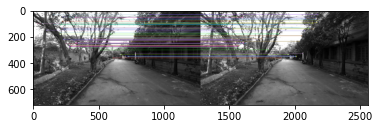

using FLANN Matcher


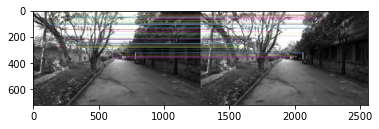

sift for 1st set of images
using Brute force matcher


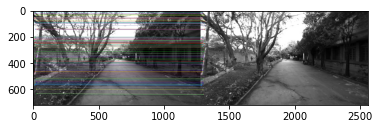

using FLANN Matcher


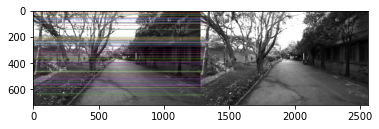

surf for 1st set of images
using Brute force matcher


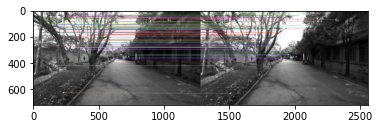

using FLANN Matcher


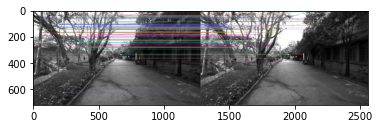

orb for 1st set of images
using Brute force matcher


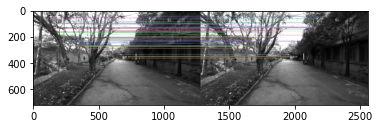

using FLANN Matcher


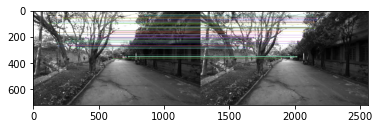

sift for 1st set of images
using Brute force matcher


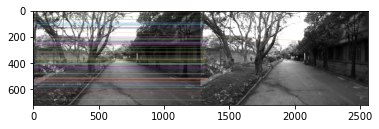

using FLANN Matcher


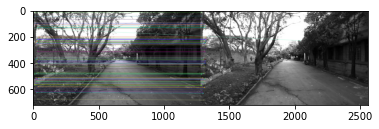

surf for 1st set of images
using Brute force matcher


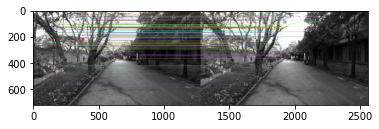

using FLANN Matcher


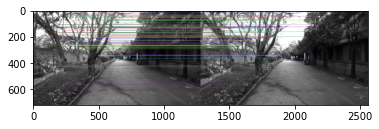

orb for 1st set of images
using Brute force matcher


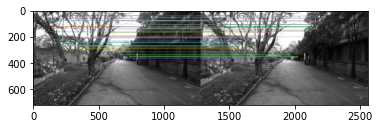

using FLANN Matcher


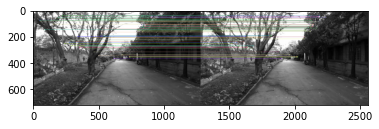

sift for 1st set of images
using Brute force matcher


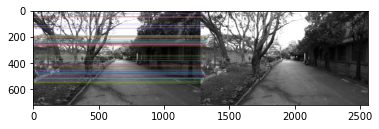

using FLANN Matcher


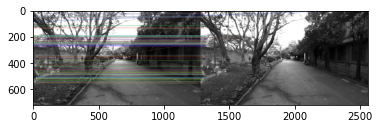

surf for 1st set of images
using Brute force matcher


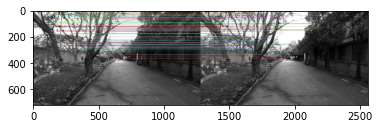

using FLANN Matcher


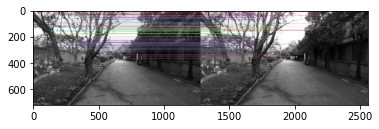

orb for 1st set of images
using Brute force matcher


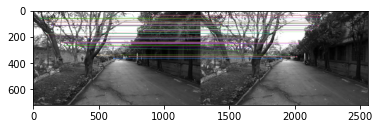

using FLANN Matcher


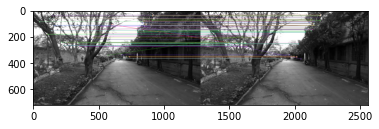

sift for 1st set of images
using Brute force matcher


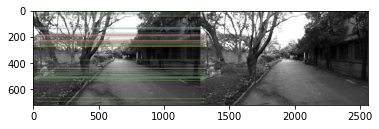

using FLANN Matcher


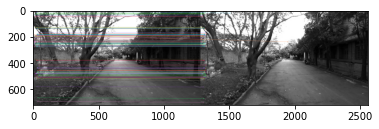

surf for 1st set of images
using Brute force matcher


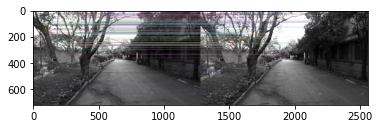

using FLANN Matcher


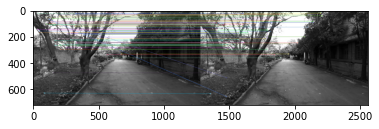

orb for 1st set of images
using Brute force matcher


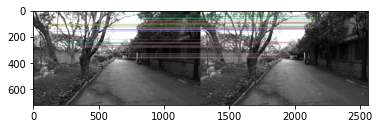

using FLANN Matcher


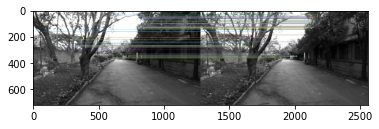

sift for 1st set of images
using Brute force matcher


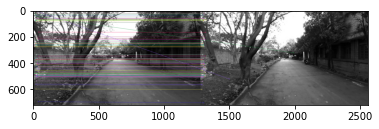

using FLANN Matcher


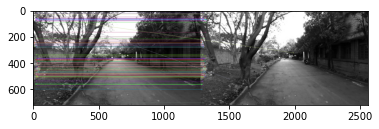

surf for 1st set of images
using Brute force matcher


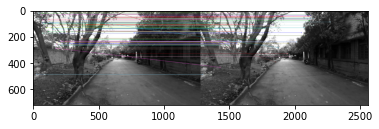

using FLANN Matcher


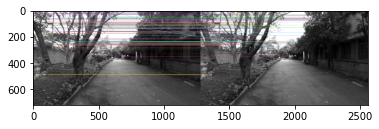

orb for 1st set of images
using Brute force matcher


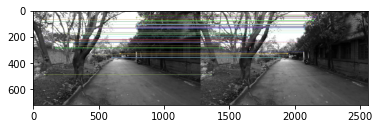

using FLANN Matcher


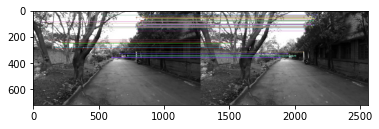

sift for 1st set of images
using Brute force matcher


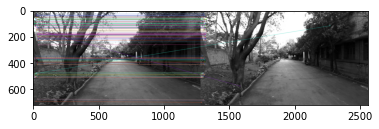

using FLANN Matcher


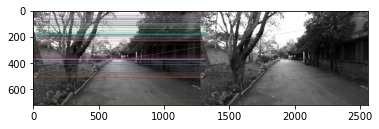

surf for 1st set of images
using Brute force matcher


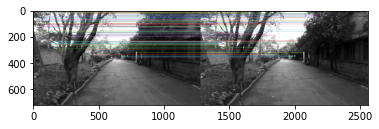

using FLANN Matcher


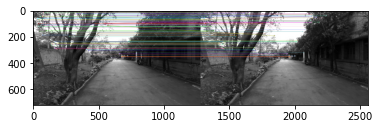

orb for 1st set of images
using Brute force matcher


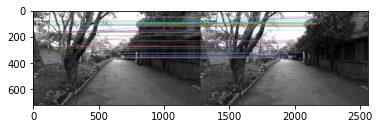

using FLANN Matcher


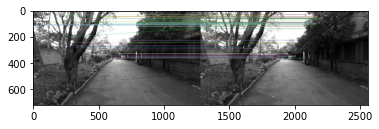

sift for 1st set of images
using Brute force matcher


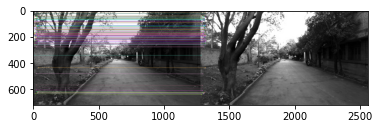

using FLANN Matcher


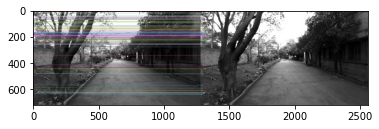

surf for 1st set of images
using Brute force matcher


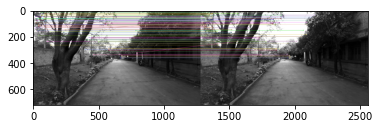

using FLANN Matcher


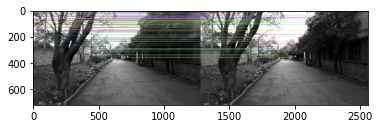

orb for 1st set of images
using Brute force matcher


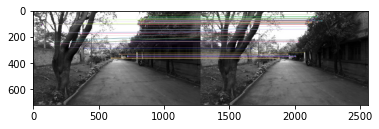

using FLANN Matcher


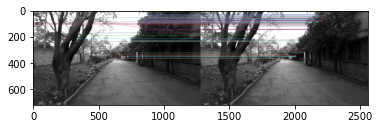

sift for 1st set of images
using Brute force matcher


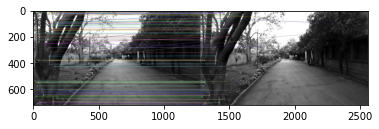

using FLANN Matcher


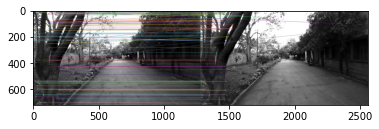

surf for 1st set of images
using Brute force matcher


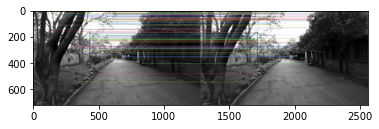

using FLANN Matcher


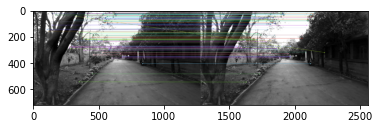

orb for 1st set of images
using Brute force matcher


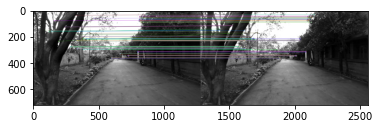

using FLANN Matcher


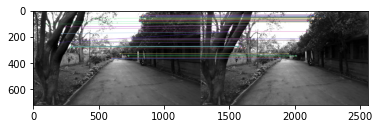

sift for 1st set of images
using Brute force matcher


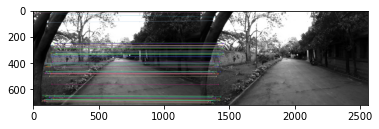

using FLANN Matcher


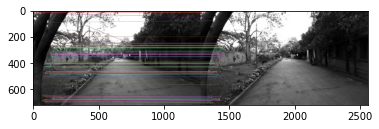

surf for 1st set of images
using Brute force matcher


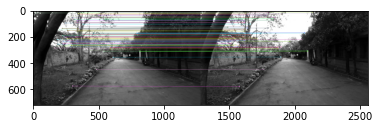

using FLANN Matcher


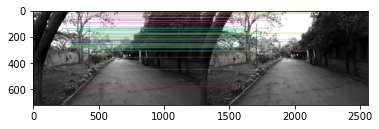

orb for 1st set of images
using Brute force matcher


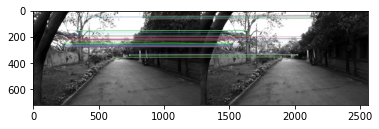

using FLANN Matcher


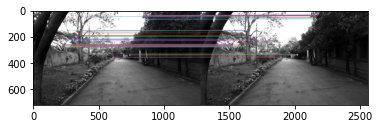

sift for 1st set of images
using Brute force matcher


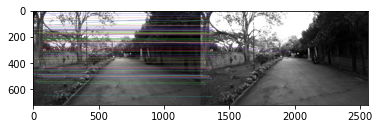

using FLANN Matcher


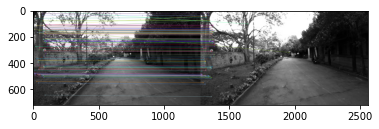

surf for 1st set of images
using Brute force matcher


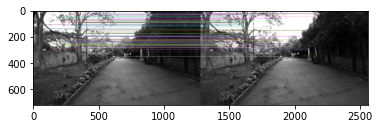

using FLANN Matcher


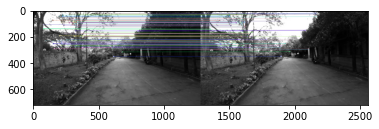

orb for 1st set of images
using Brute force matcher


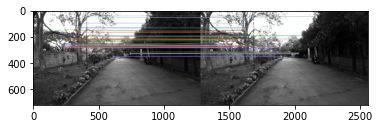

using FLANN Matcher


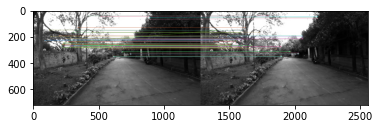

sift for 1st set of images
using Brute force matcher


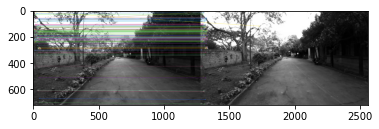

using FLANN Matcher


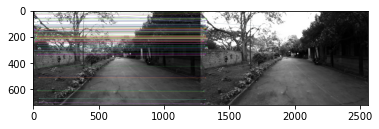

surf for 1st set of images
using Brute force matcher


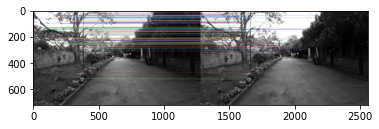

using FLANN Matcher


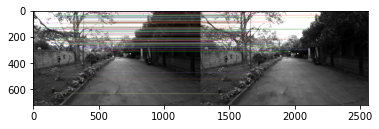

orb for 1st set of images
using Brute force matcher


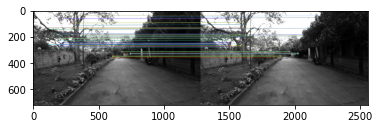

using FLANN Matcher


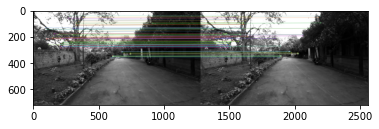

sift for 1st set of images
using Brute force matcher


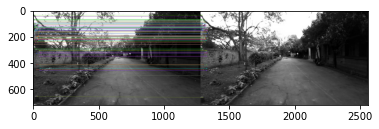

using FLANN Matcher


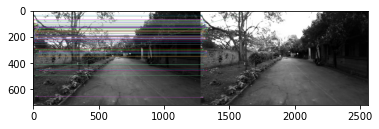

surf for 1st set of images
using Brute force matcher


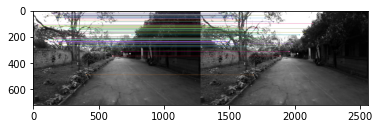

using FLANN Matcher


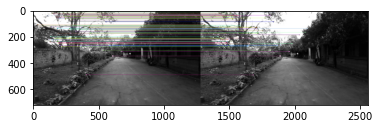

orb for 1st set of images
using Brute force matcher


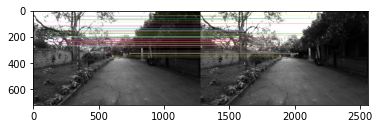

using FLANN Matcher


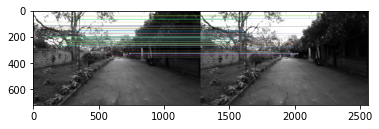

sift for 1st set of images
using Brute force matcher


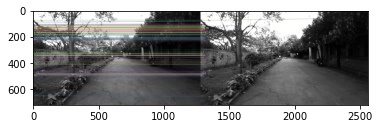

using FLANN Matcher


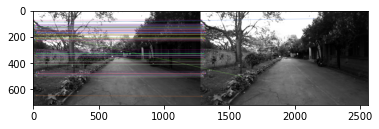

surf for 1st set of images
using Brute force matcher


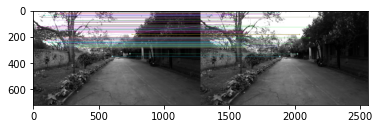

using FLANN Matcher


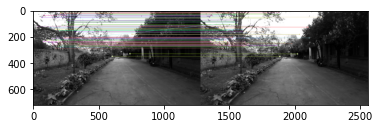

orb for 1st set of images
using Brute force matcher


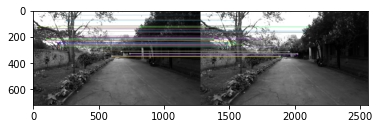

using FLANN Matcher


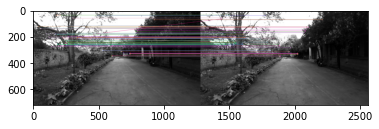

sift for 1st set of images
using Brute force matcher


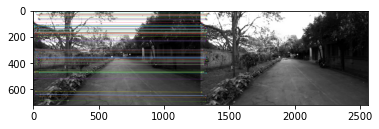

using FLANN Matcher


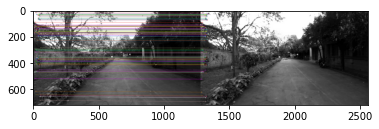

surf for 1st set of images
using Brute force matcher


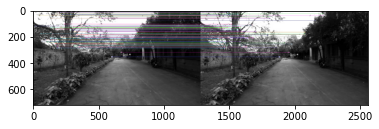

using FLANN Matcher


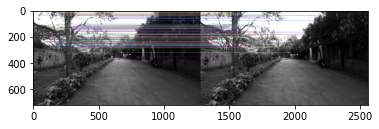

orb for 1st set of images
using Brute force matcher


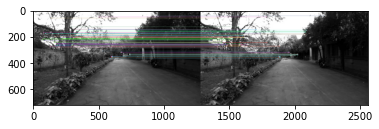

using FLANN Matcher


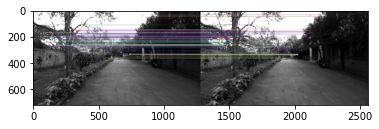

sift for 1st set of images
using Brute force matcher


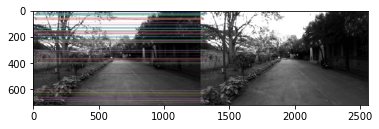

using FLANN Matcher


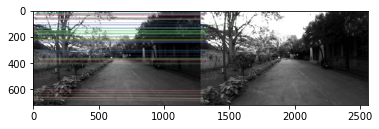

surf for 1st set of images
using Brute force matcher


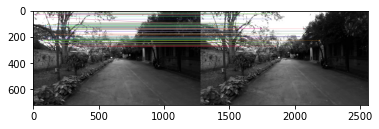

using FLANN Matcher


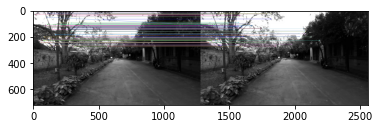

orb for 1st set of images
using Brute force matcher


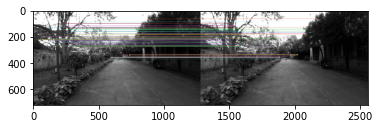

using FLANN Matcher


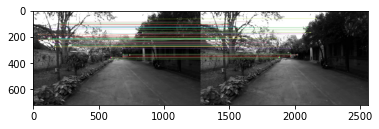

sift for 1st set of images
using Brute force matcher


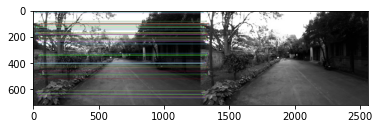

using FLANN Matcher


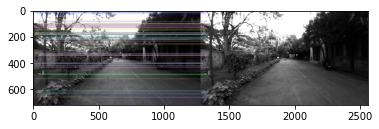

surf for 1st set of images
using Brute force matcher


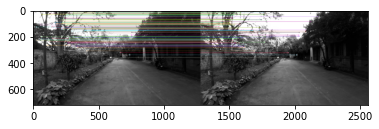

using FLANN Matcher


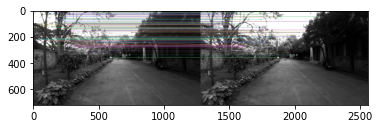

orb for 1st set of images
using Brute force matcher


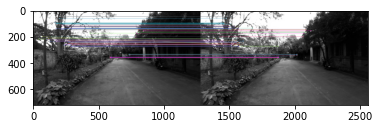

using FLANN Matcher


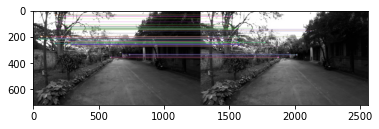

sift for 1st set of images
using Brute force matcher


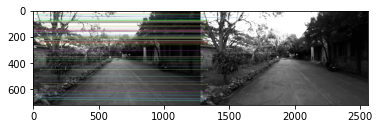

using FLANN Matcher


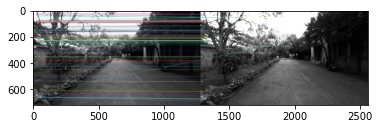

surf for 1st set of images
using Brute force matcher


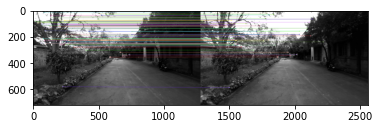

using FLANN Matcher


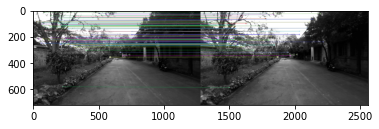

orb for 1st set of images
using Brute force matcher


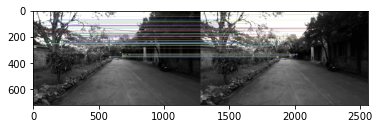

using FLANN Matcher


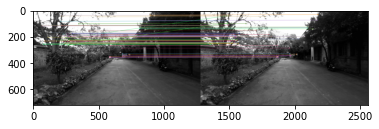

sift for 1st set of images
using Brute force matcher


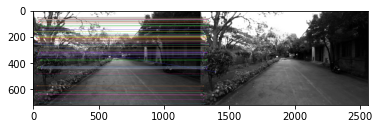

using FLANN Matcher


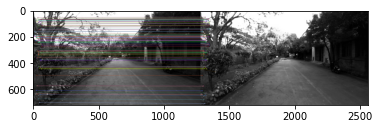

surf for 1st set of images
using Brute force matcher


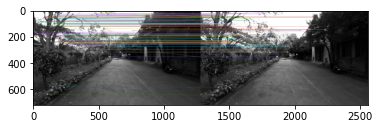

using FLANN Matcher


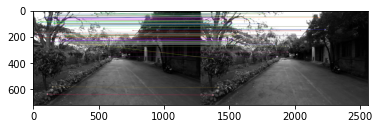

orb for 1st set of images
using Brute force matcher


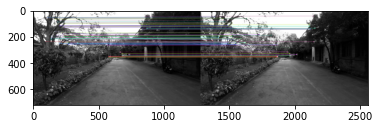

using FLANN Matcher


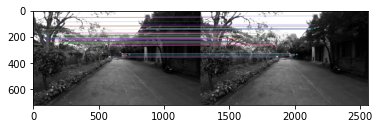

sift for 1st set of images
using Brute force matcher


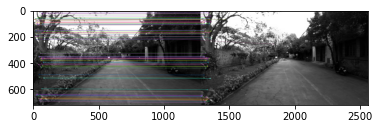

using FLANN Matcher


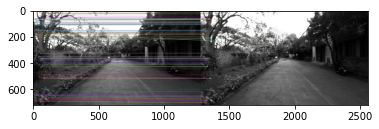

surf for 1st set of images
using Brute force matcher


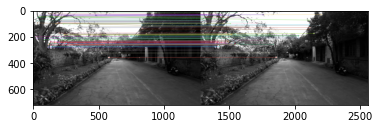

using FLANN Matcher


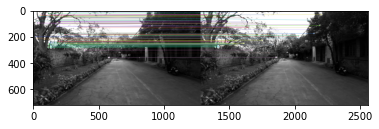

orb for 1st set of images
using Brute force matcher


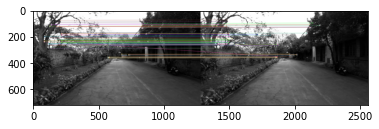

using FLANN Matcher


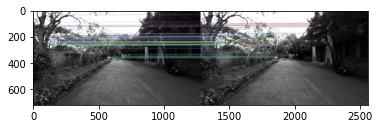

sift for 1st set of images
using Brute force matcher


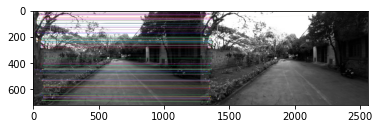

using FLANN Matcher


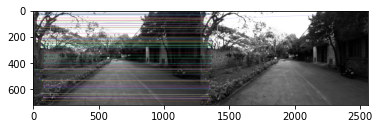

surf for 1st set of images
using Brute force matcher


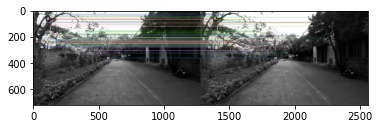

using FLANN Matcher


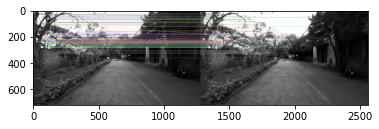

orb for 1st set of images
using Brute force matcher


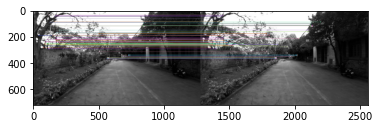

using FLANN Matcher


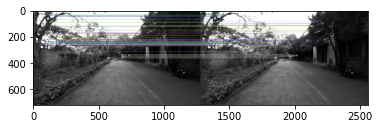

sift for 1st set of images
using Brute force matcher


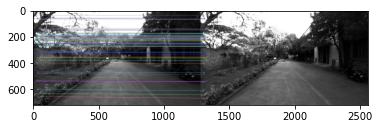

using FLANN Matcher


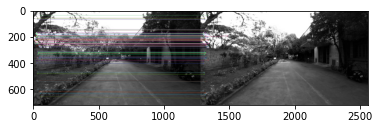

surf for 1st set of images
using Brute force matcher


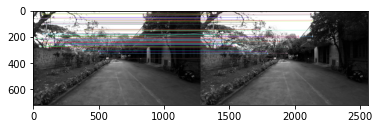

using FLANN Matcher


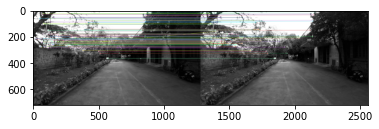

orb for 1st set of images
using Brute force matcher


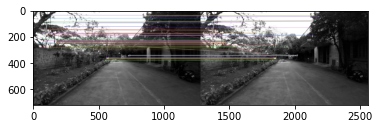

using FLANN Matcher


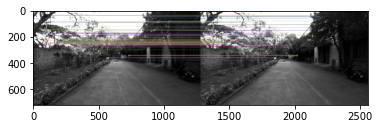

sift for 1st set of images


KeyboardInterrupt: ignored

In [ ]:
gap_between_images = 10
image1_names,image2_names = get_data(gap_between_images)
idx = 1
for image1_name,image2_name in zip(image1_names,image2_names):
  print(f"sift for pair {idx} of images")
  sift(image1_name,image2_name)
  print(f"surf for pair {idx} of images")
  surf(image1_name,image2_name)
  print(f"orb for pair {idx} of images")
  orb(image1_name,image2_name)
  idx = idx+1